In [1]:
from matplotlib import pyplot as plt
from graph import create_random_graph , to_useful, assign_states , create_final_graph
import networkx as nx
from model import create_model
import tensorflow as tf
from mutate import mutate_dag
from crossover import crossover
from Individual import Individual
from Generation import Generation
import visualkeras

2023-12-18 12:51:23.265102: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 12:51:23.297977: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 12:51:23.298011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 12:51:23.299084: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 12:51:23.304663: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 12:51:23.305689: I tensorflow/core/platform/cpu_feature_guard.cc:1

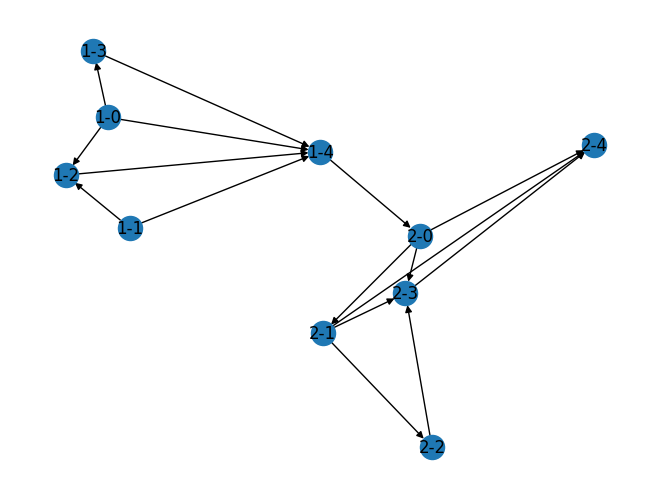

In [2]:
g1 = create_random_graph(5,0.8)
g = create_random_graph(5,0.8)
g1 = create_final_graph(g1,g)
g1 = assign_states(g1,(1,3,1,1,3,1))
#print(g1.nodes[0]['state'])
nx.draw(g1, with_labels=True)
plt.draw()

OutEdgeDataView([('1-0', '1-2', {'_igraph_index': 0}), ('1-0', '1-3', {'_igraph_index': 2}), ('1-0', '1-4', {'_igraph_index': 3}), ('1-2', '1-4', {'_igraph_index': 5}), ('1-3', '1-4', {'_igraph_index': 6}), ('1-4', '2-0', {}), ('2-0', '2-1', {'_igraph_index': 0}), ('2-0', '2-3', {'_igraph_index': 2}), ('2-0', '2-4', {'_igraph_index': 5}), ('2-1', '2-2', {'_igraph_index': 1}), ('2-1', '2-3', {'_igraph_index': 3}), ('2-1', '2-4', {'_igraph_index': 6}), ('2-2', '2-3', {'_igraph_index': 4}), ('2-3', '2-4', {'_igraph_index': 7})])

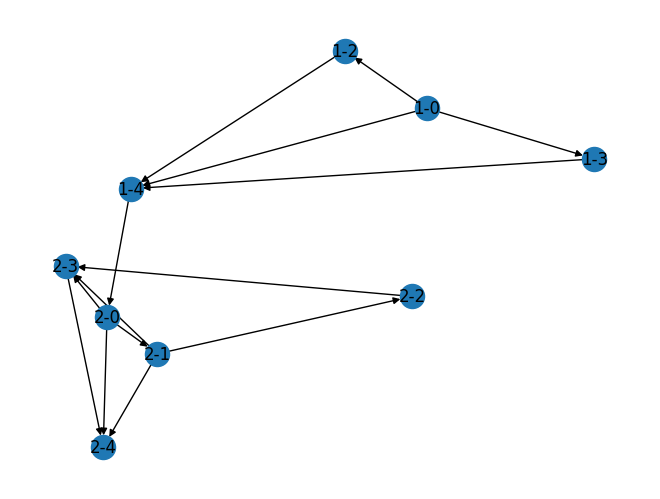

In [3]:
g1 = to_useful(g1)
nx.draw(g1, with_labels=True)
plt.draw()
g1.edges(data=True)

In [4]:
g1.nodes

NodeView(('1-0', '1-2', '1-3', '1-4', '2-0', '2-1', '2-2', '2-3', '2-4'))

In [5]:
'''import numpy as np
import random
import tensorflow_datasets as tfds

#import minst dataset and split to test trin
mnist_dataset, mnist_info = tfds.load(name='crema_d', with_info=True, as_supervised=True)

def scale(waveform, label):
    waveform = tf.cast(waveform,tf.float64)
    spectrogram = tf.signal.stft(
    waveform, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[..., tf.newaxis]
    spectrogram = tf.image.resize(spectrogram,(128,128))
    label = tf.one_hot(label, 6)
    return spectrogram, label

train_data = mnist_dataset['train'].map(scale)
test_data = mnist_dataset['test'].map(scale)
train_image , train_label = next(iter(train_data.batch(1)))

train_ds = train_data.shuffle(10).cache().prefetch(10).batch(64)
test_ds = test_data.cache().prefetch(10).batch(64)

print(train_image.shape)
print(train_label.shape)'''

"import numpy as np\nimport random\nimport tensorflow_datasets as tfds\n\n#import minst dataset and split to test trin\nmnist_dataset, mnist_info = tfds.load(name='crema_d', with_info=True, as_supervised=True)\n\ndef scale(waveform, label):\n    waveform = tf.cast(waveform,tf.float64)\n    spectrogram = tf.signal.stft(\n    waveform, frame_length=255, frame_step=128)\n    spectrogram = tf.abs(spectrogram)\n    spectrogram = spectrogram[..., tf.newaxis]\n    spectrogram = tf.image.resize(spectrogram,(128,128))\n    label = tf.one_hot(label, 6)\n    return spectrogram, label\n\ntrain_data = mnist_dataset['train'].map(scale)\ntest_data = mnist_dataset['test'].map(scale)\ntrain_image , train_label = next(iter(train_data.batch(1)))\n\ntrain_ds = train_data.shuffle(10).cache().prefetch(10).batch(64)\ntest_ds = test_data.cache().prefetch(10).batch(64)\n\nprint(train_image.shape)\nprint(train_label.shape)"

In [6]:
import numpy as np
import random
import tensorflow_datasets as tfds

mnist_dataset , mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True,split=['train', 'test[:50%]'])
train_data = mnist_dataset[0]
test_data = mnist_dataset[1]
def scale(image, label):
    image = tf.cast(image,tf.float64)
    image = image/255
    label = tf.one_hot(label, 10)
    return image, label
train_data = train_data.map(scale)
test_data = test_data.map(scale)
train_ds = train_data.cache().batch(64).prefetch(10)
test_ds = test_data.cache().batch(64).prefetch(10)
train_image , train_label = next(iter(train_data.batch(1)))
print(train_image.shape)
print(train_label)

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(1, 28, 28, 1)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


2023-12-18 12:51:26.602708: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [7]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/msambare/fer2013')



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
Skipping, found downloaded files in "./fer2013" (use force=True to force download)


In [8]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    'fer2013/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'fer2013/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

def scale(image, label):
    image = tf.cast(image,tf.float64)
    image = image/255
    label = tf.one_hot(label, 7)
    return image, label
train_data = train_data.map(scale)
test_data = test_data.map(scale)
train_ds = train_data.cache().batch(64).prefetch(10)
test_ds = test_data.cache().batch(64).prefetch(10)
train_image , train_label = next(iter(train_data.batch(1)))
print(train_image.shape)
print(train_label)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
(1, 32, 48, 48, 1)
tf.Tensor(
[[[1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]]], shape=(1, 32, 7), dtype=float32)


In [9]:
model = create_model(g1,(28,28,1),10)

input 1-0 [] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>}
hidden_1 1-2 ['1-0'] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>}
(None, 28, 28, 1)
(35, 35)
hidden_1 1-3 ['1-0'] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, '1-2': <KerasTensor: shape=(None, 8, 8, 9) dtype=float32 (created by layer '1-2.1-0conv2d')>}
(None, 28, 28, 1)
(53, 53)
transition 1-4 ['1-0', '1-2', '1-3'] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, '1-2': <KerasTensor: shape=(None, 8, 8, 9) dtype=float32 (created by layer '1-2.1-0conv2d')>, '1-3': <KerasTensor: shape=(None, 26, 26, 11) dtype=float32 (created by layer '1-3.1-0conv2d')>}
transition 2-0 ['1-4'] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, '1-2': <KerasTensor: shape=(None, 8, 8, 9) dtype=float32 (created by la

In [10]:

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),
                                                                                                               #tf.keras.metrics.AUC(from_logits=True),
                                                                                                               #tf.keras.metrics.Precision(),
                                                                                                               #tf.keras.metrics.Recall()
                                                                                                               ])

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 1-2.1-0conv2d (Conv2DPadLa  (None, 8, 8, 9)              11034     ['input_layer[0][0]']         
 yer)                                                                                             
                                                                                                  
 1-3.1-0conv2d (Conv2DPadLa  (None, 26, 26, 11)           30910     ['input_layer[0][0]']         
 yer)                                                                                             
                                                                                              

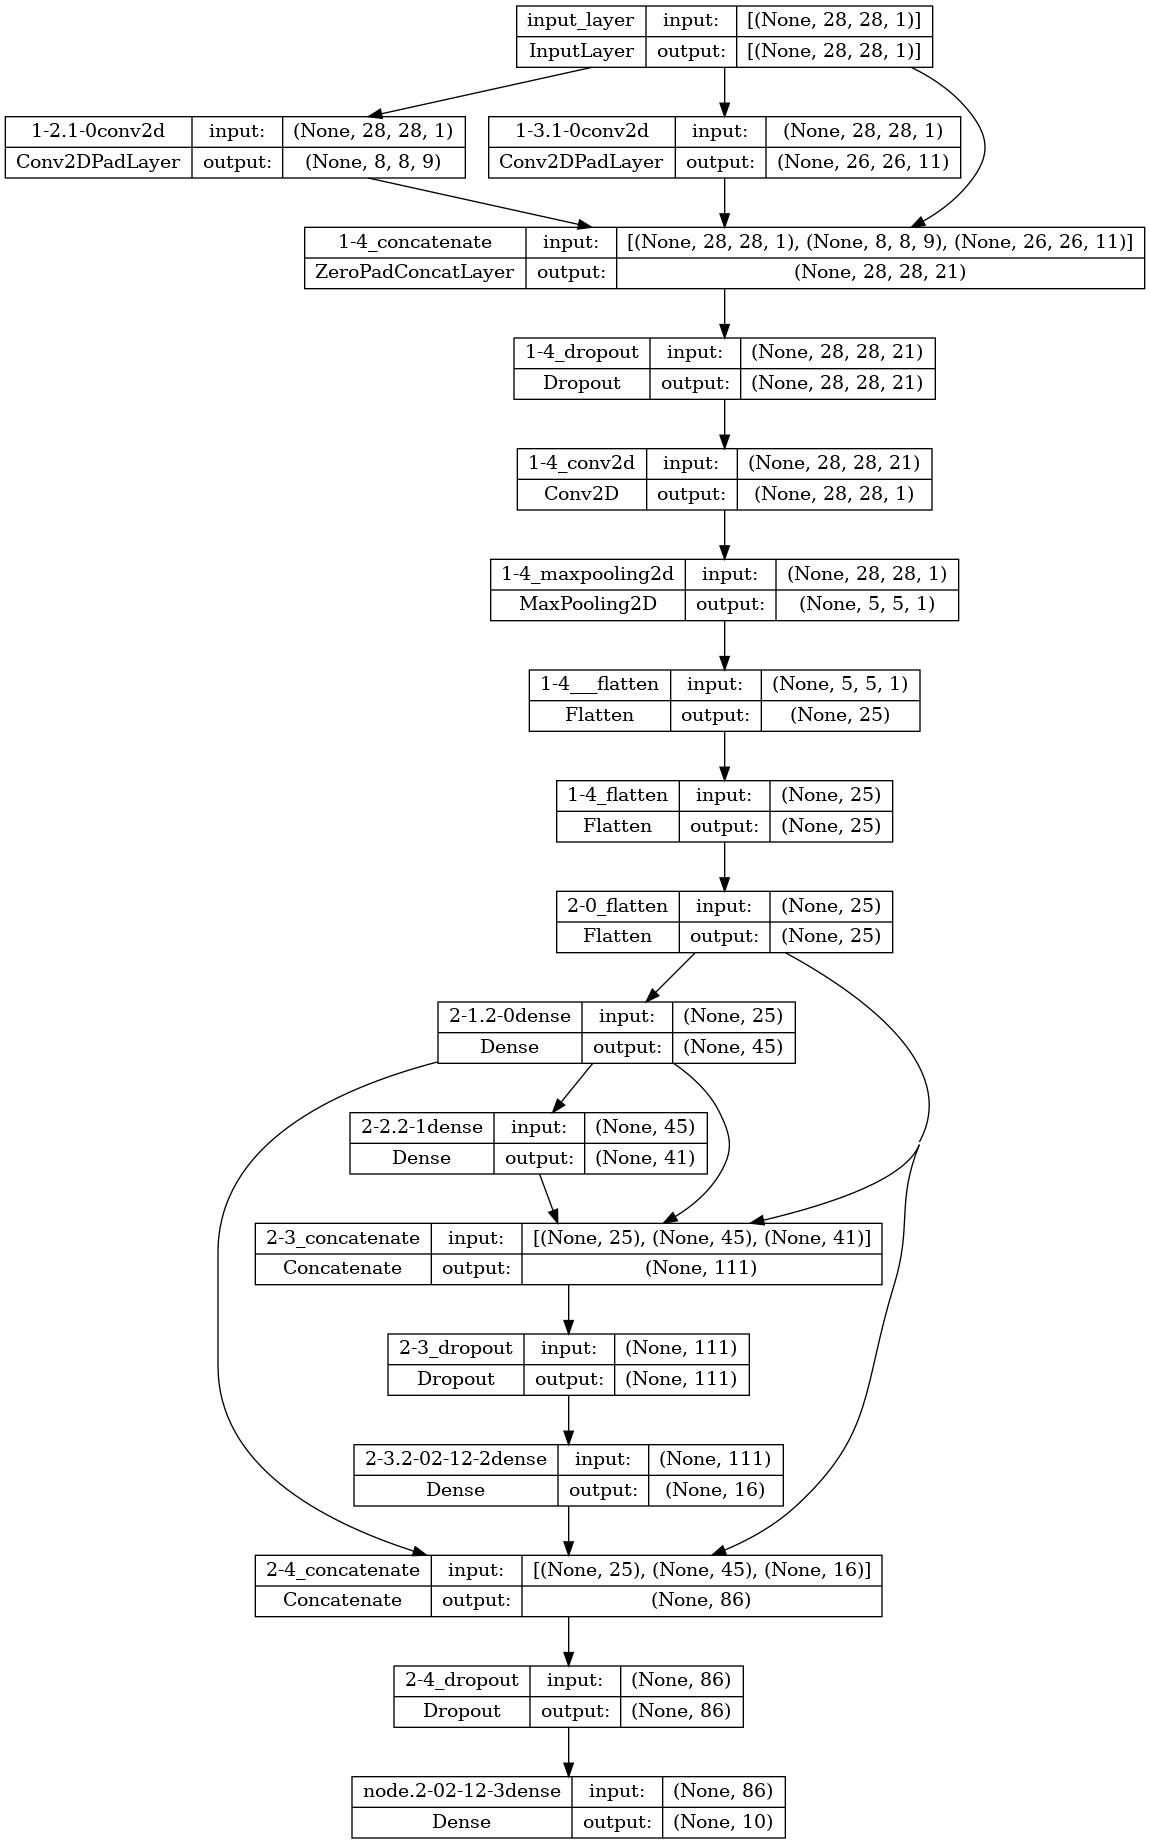

In [12]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [13]:
'''g1 = create_random_graph(5,0.5)
g1 = assign_states(g1,(1,3,1))
fig , ax = plt.subplots(2,1)
g3 = mutate_dag(g1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g3, with_labels=True, ax=ax[1])
plt.draw()'''


'g1 = create_random_graph(5,0.5)\ng1 = assign_states(g1,(1,3,1))\nfig , ax = plt.subplots(2,1)\ng3 = mutate_dag(g1)\nnx.draw(g1, with_labels=True, ax=ax[0])\nnx.draw(g3, with_labels=True, ax=ax[1])\nplt.draw()'

In [14]:
'''g4 = crossover(g1,g3)
fig , ax = plt.subplots(2,1)
nx.draw(g1, with_labels=True, ax=ax[0])
nx.draw(g4, with_labels=True, ax=ax[1])
plt.draw()'''

'g4 = crossover(g1,g3)\nfig , ax = plt.subplots(2,1)\nnx.draw(g1, with_labels=True, ax=ax[0])\nnx.draw(g4, with_labels=True, ax=ax[1])\nplt.draw()'

In [15]:
from graph import create_random_graph , to_useful, assign_states
dag = to_useful(g1)

In [16]:
in1 = Individual((28,28,1),(10),(1,3,1,1,3,1),5,0.9)
tf.keras.utils.plot_model(in1.model, to_file='model.png', show_shapes=True)
model = in1.model
#visualkeras.layered_view(model, to_file='output.png').show() # view model structure in jupyter (suggested)

input 1-0 [] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>}
hidden_1 1-1 ['1-0'] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>}
(None, 28, 28, 1)
(43, 43)
hidden_1 1-2 ['1-0', '1-1'] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, '1-1': <KerasTensor: shape=(None, 16, 16, 14) dtype=float32 (created by layer '1-1.1-0conv2d')>}
(None, 28, 28, 15)
(20, 20)
hidden_1 1-3 ['1-0', '1-1', '1-2'] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, '1-1': <KerasTensor: shape=(None, 16, 16, 14) dtype=float32 (created by layer '1-1.1-0conv2d')>, '1-2': <KerasTensor: shape=(None, 9, 9, 16) dtype=float32 (created by layer '1-2.1-01-1conv2d')>}
transition 1-4 ['1-0', '1-1', '1-2', '1-3'] {'1-0': <KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_layer')>, '1-1': <KerasTensor: shape=(None, 16,

In [17]:
x_test_val, y_test_val = [], []
for x, y in test_ds.take(1):
    x_test_val.append(x)
    y_test_val.append(y)
x_test_val = np.concatenate(x_test_val)
y_test_val = np.concatenate(y_test_val)


2023-12-18 12:51:32.688835: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class ClassificationMatrixCallback(tf.keras.callbacks.Callback):
    def __init__(self, x_test_val,y_test_val, class_names):
        super(ClassificationMatrixCallback, self).__init__()
        self.x_val = x_test_val
        self.y_val = y_test_val
        self.class_names = class_names

    def on_epoch_end(self, step, logs=None):
            y_pred = np.argmax(self.model.predict(self.x_val), axis=1)
            y_true = np.argmax(self.y_val, axis=1)
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=self.class_names, yticklabels=self.class_names)
            plt.title('Classification Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()


In [19]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
callback = [ClassificationMatrixCallback(x_test_val,y_test_val,class_names),tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)]
metrics = [tf.keras.metrics.AUC(from_logits=True),tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC(name='prc', curve='PR')]
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[
                                                                                            #tf.keras.metrics.Accuracy(),
                                                                                            tf.keras.metrics.AUC(from_logits=True),
                                                                                            tf.keras.metrics.CategoricalAccuracy(),
                                                                                            #tf.keras.metrics.Precision(),
                                                                                            #tf.keras.metrics.Recall(),
                                                                                            tf.keras.metrics.AUC(name='prc', curve='PR'),
                                                                                            ]
                                                                                            )
model.summary()
class_names = ['0','1','2','3','4','5','6','7','8','9']

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 1-1.1-0conv2d (Conv2DPadLa  (None, 16, 16, 14)           25900     ['input_layer[0][0]']         
 yer)                                                                                             
                                                                                                  
 1-2_concatenate (ZeroPadCo  (None, 28, 28, 15)           0         ['input_layer[0][0]',         
 ncatLayer)                                                          '1-1.1-0conv2d[0][0]']       
                                                                                            

In [20]:
#model.fit(train_ds,validation_data=test_ds, epochs=3000,
          #steps_per_epoch=50,
           #callbacks=[callback,ClassificationMatrixCallback(x_test_val,y_test_val ,class_names)])

In [21]:
loss = tf.keras.losses.CategoricalCrossentropy()
ga = Generation(input_size=(48,48,1),output_size=(7),states=(1,1,1,1,1,1),nodes=3

,edges=0.9,population=7,limit=18,train_ds=train_ds,test_ds=test_ds,optimizer=optimizer,loss=loss,metrics=metrics,callbacks=callback)
ga.run(10,0.8,0.8)

input 1-0 [] {'1-0': <KerasTensor: shape=(None, 48, 48, 1) dtype=float32 (created by layer 'input_layer')>}
hidden_1 1-1 ['1-0'] {'1-0': <KerasTensor: shape=(None, 48, 48, 1) dtype=float32 (created by layer 'input_layer')>}
(None, 48, 48, 1)
(33, 33)
transition 1-2 ['1-1'] {'1-0': <KerasTensor: shape=(None, 48, 48, 1) dtype=float32 (created by layer 'input_layer')>, '1-1': <KerasTensor: shape=(None, 16, 16, 14) dtype=float32 (created by layer '1-1.1-0conv2d')>}
transition 2-0 ['1-2'] {'1-0': <KerasTensor: shape=(None, 48, 48, 1) dtype=float32 (created by layer 'input_layer')>, '1-1': <KerasTensor: shape=(None, 16, 16, 14) dtype=float32 (created by layer '1-1.1-0conv2d')>, '1-2': <KerasTensor: shape=(None, 25) dtype=float32 (created by layer '1-2_flatten')>}
output 2-2 ['2-0'] {'1-0': <KerasTensor: shape=(None, 48, 48, 1) dtype=float32 (created by layer 'input_layer')>, '1-1': <KerasTensor: shape=(None, 16, 16, 14) dtype=float32 (created by layer '1-1.1-0conv2d')>, '1-2': <KerasTensor: 

2023-12-18 12:51:34.126194: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


ValueError: in user code:

    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 48, 48, 1), found shape=(32, 32, 48, 48, 1)
